In [2]:
%plot inline -w 600 -h 600 -r 150

In [ ]:
# 8 Optimization - Neural Networks - The Perceptron

## Introduction

Neural networks are excellent examples of (often non-linear) function optimization. 

Even though real neurons look like this:

![Real Neuron](https://static.turbosquid.com/Preview/2014/12/03__09_02_06/all.jpg5254a144-6d9d-4a4f-b9b0-6fcbba4f64bcOriginal.jpg)

and have highly complicated biochemical processes that control their firing given input in the many dendrites, people have long thought about how to approximate their function mathematically.



### The artificial neuron

We will briefly review some "proper" Nobel-prize-winning equations in the later part of the course, when we talk about partial derivative equations - however, as you may imagine, a real neuron's complexity is rather daunting, so for simulations, simpler models would be good as a start. 

Here's an extremely simplified model - a so-called artificial neuron which simply 
1. takes several inputs $x_i$
2. sums them up as $\sum x_i$
3. pushes them through an activation function $f(\sum x_i)$ and 
4. delivers one output $y=f(\sum x_i)$ to downstream neurons.

![Simplified neuron and model](https://cdn-images-1.medium.com/max/1200/1*SJPacPhP4KDEB1AdhOFy_Q.png)

This model is based on the ground-breaking modeling work outlined in the paper by McCullough and Pitts from 1943. In this work, they used a step-function as $f$. 

McCulloch, W. and Pitts, W. (1943). A logical calculus of the ideas immanent in nervous activity. Bulletin of Mathematical Biophysics, 5:115–133.

### Activation functions 

The purpose of the activation function is to introduce more complicated processing of the inputs - we will talk about this more later. The most common choices are plotted below:

In [3]:
%%file activation.m

function out = activation(x,type)
    if nargin==1
        type='tanh';
    end
    
    switch type
        case 'tanh'
            out = tanh(x);
        case 'logistic'
            out = 1./(1+exp(-x));
        case 'relu'
            out = max(zeros(size(x)),x);
        case 'perceptron'
            out = double(x>=0); % 0, 1 output.
        case 'linear'
            out = x;
        otherwise
            error(['do not know type ' type])
    end
    

% 너의 선택이야.
% Rectified Linear Unit.

Created file '/Users/sucky/Desktop/MATLAB_for_Engineering_Math_Projects/ENG_MATH/5:14/activation.m'.


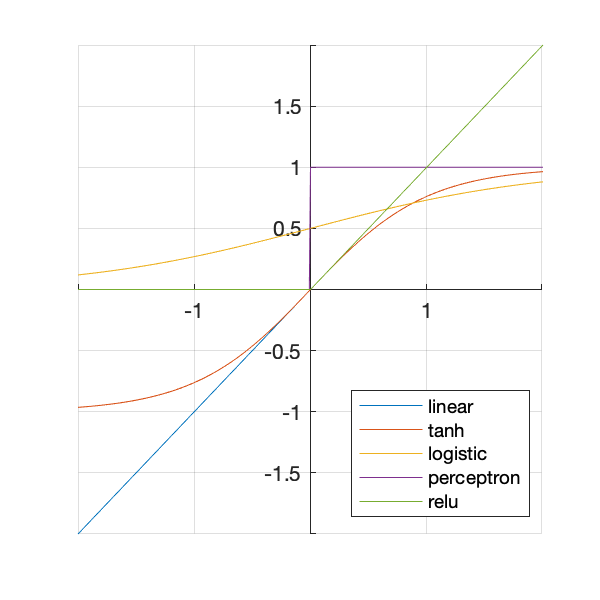

In [4]:
% x-values
x=[-2:.01:2];

% activation functions
figure(); hold on
plot(x,activation(x,'linear'),'displayname','linear');
plot(x,activation(x,'tanh'),'displayname','tanh');
plot(x,activation(x,'logistic'),'displayname','logistic');
plot(x,activation(x,'perceptron'),'displayname','perceptron');
plot(x,activation(x,'relu'),'displayname','relu');
grid on
ax = gca;
ax.XAxisLocation = 'origin';
ax.YAxisLocation = 'origin';
legend('location','se')


% logistic, tanh => very similar
% => both are called 'sigmoid'

% real neuron : perceptron-ish => 아예 했다 안했다 함. => 근데 임계치 지나면 또 마비됨 

### Learning networks - the perceptron

Let's try to do something simple now. Let's assume that our data we would like to learn consists of pairs $\vec{x}_i,y_i$, and that the $y_i$ can only take on **two values** ($y_i=-1,1$). 

Furthermore, we assume that the data has a **linear structure**. We can quantify this like so: 

There exists some $\vec{w}^* \in \mathbb{R}^d$, such that $\|\vec{w}^*\|=1$  and for
some $\alpha > 0$, for all $i$ $\in {1, 2, \dots , n}$ it holds that:

$$
y_i(\vec{w}^*\vec{x}_i)>\alpha
$$

Which, when you remember that $y_i=-1,1$, simply says that the sign of $(\vec{w}^*\vec{x}_i)$ is the same as the corresponding $y_i$.

The constant $\alpha$ is introduced as a lower bound on the value of $y_i(\vec{w}^*\vec{x}_i)$. 

Note, that if you find such a vector $\vec{w}^*$, then all points that satisify

$$
(\vec{w}^*\vec{x})=0
$$

define a line (through the origin - if we augment our x-s with a leading "1" and add another leading $w_0$ to $\vec{w}$, then we can also model the intercept or bias of that line)!


Finally, we will assume that all input values $\vec{x}_i$ are bounded from above (so the maximum distance from the origin for these points is some number $D$, such that for all $i$, $\|\vec{x}_i\|<D$.

How do we update the weights now? Let's write the algorithm created by Frank Rosenblatt in pseudo-code:

<div class="alert alert-warning">
set weights $\vec{w}= $

while any :

&nbsp;&nbsp;&nbsp;choose one index $k$, for which 

&nbsp;&nbsp;&nbsp;set weights to 

</div>

Let's write down the algorithm in Matlab - this is much longer than the pseudocode above, but only because of the plotting of the updated decision hyperplane that happens during the execution:

# Bottom line

## 모델 : 벡터를 넣으면 -1 인지 1인지 나오고, 그것이 기존의 y답과 다르면 업데이트 해야됨. =

In [1]:
%%file myPerceptron.m

function w = myPerceptron(x,y,maxIter,doShuffle,doPlot)

% init weights
w = zeros(size(x,2),1);

% check outputs
outputs = y.*(x*w)<=0; % find all the point for which the mentioned det(판별식) below zero : mis classi data ; exist 1

iter=1;

% plot data and initial guess
xs=[min(x(:,2)):max(x(:,2))];
if (doPlot)
    indPos = y==1;
    indNeg = y==-1;
    scatter(x(indPos,2),x(indPos,3),'gx');
    hold on; scatter(x(indNeg,2),x(indNeg,3),'ro');
    % you should think where this comes from!
    ys=(-w(2)*xs-w(1))./w(3); % i get 3 weights =>  for the bias w1x1 + w2x2 + w0 => parameter tuning. / vandermonde also requires bias
    plot(xs,ys,'b-')
    xlim([xs(1) xs(end)]);
    ylim([min(x(:,3)) max(x(:,3))]);
    title(sprintf('%d: %d wrong\n',iter,length(find(outputs))))
    grid on;
    
end

% as long as there any misclassified points
% and we are within iteration limits, do:
while(any(outputs) & iter<=maxIter)
    % get all misclassified points
    ind = find(outputs);
    if (doPlot)
        ys=(-w(2)*xs-w(1))./w(3);
        plot(xs,ys,'b-')
        xlim([xs(1) xs(end)]);
        ylim([min(x(:,3)) max(x(:,3))]);
        title(sprintf('%d: %d wrong\n',iter,length(find(outputs))))
        waitforbuttonpress(); % user does the next updatae
    end
    % shuffle indices of points if desired
    if (doShuffle)
        ind = ind(randperm(length(ind)));
    end
    % update the weight with one misclassified point
    w = w + y(ind(1))*x(ind(1),:)';
    iter=iter+1;
    % and determine the new classification output
    outputs = y.*(x*w)<=0;
end

% plot the final solution
if (doPlot)
    ys=(-w(2)*xs-w(1))./w(3);
    plot(xs,ys,'r-')
    title(sprintf('%d: %d wrong\n',iter,length(find(outputs))));
    xlim([xs(1) xs(end)]);
    ylim([min(x(:,3)) max(x(:,3))]);
end


Created file '/Users/sucky/Desktop/MATLAB_for_Engineering_Math_Projects/ENG_MATH/5:14/myPerceptron.m'.


Let's test this algorithm with two reasonably well-separated point clouds in two dimensions:

In [2]:
%%plot native
x = [randn(20,2);randn(20,2)+4]; %live around zero gaussian blob , next live around for.  => 4 is 2std => safe
y = [-1*ones(20,1);ones(20,1)]; 
w = myPerceptron([ones(length(x),1) x],y,50,true,true); % 1 is for bias , it's really like vandermonde

% line 으로 나눌 수 있음

% 이단계까지 나의 클래시파이어는 아직 밑에 박혀있음.

% 이제 조절해가야지

% 질문 : Why is mine 12? 

% 어떻게 두 클래스를 나눌까 ??
% 머가 베스트야??
% 퍼셉트론으로는 힘듬

Error using waitforbuttonpress
waitforbuttonpress exit because target figure has been deleted

Error in myPerceptron (line 40)
        waitforbuttonpress(); % user does the next updatae



Error: -1

In [1]:
randn(20,2) + 4


ans =

    4.5377    4.6715
    5.8339    2.7925
    1.7412    4.7172
    4.8622    5.6302
    4.3188    4.4889
    2.6923    5.0347
    3.5664    4.7269
    4.3426    3.6966
    7.5784    4.2939
    6.7694    3.2127
    2.6501    4.8884
    7.0349    2.8529
    4.7254    2.9311
    3.9369    3.1905
    4.7147    1.0557
    3.7950    5.4384
    3.8759    4.3252
    5.4897    3.2451
    5.4090    5.3703
    5.4172    2.2885



And we can see how the algorithm adjusts the line so that it tries to better capture the distribution of the data.

The perceptron algorithm like this has two important properties:

<div class="alert: alert-warning">
<p> 1. It ... found one line that can separate the classes.

<p>2. It is an ... method as the weights are updated on ... point only!
</div>

클래스 나눌수 있자 마자 멈춤

온라인 메소드라고 부름, 하나 바이 하나 업뎉이라서

퍼셉트론이 => 이상적이지 않은 이유이기도 함 =>

그렇다면 ?? !!

In [3]:
help randn

 RANDN Normally distributed pseudorandom numbers.
    R = RANDN(N) returns an N-by-N matrix containing pseudorandom values drawn
    from the standard normal distribution.  RANDN(M,N) or RANDN([M,N]) returns
    an M-by-N matrix. RANDN(M,N,P,...) or RANDN([M,N,P,...]) returns an
    M-by-N-by-P-by-... array. RANDN returns a scalar.  RANDN(SIZE(A)) returns
    an array the same size as A.
 
    Note: The size inputs M, N, P, ... should be nonnegative integers.
    Negative integers are treated as 0.
 
    R = RANDN(..., CLASSNAME) returns an array of normal values of the 
    specified class. CLASSNAME can be 'double' or 'single'.
 
    R = RANDN(..., 'like', Y) returns an array of normal values of the
    same class as Y.
 
    The sequence of numbers produced by RANDN is determined by the settings of
    the uniform random number generator that underlies RAND, RANDN, and RANDI.
    RANDN uses one or more uniform random values to create each normal random
    value.  Control that share

In [3]:
%%plot native
x = [randn(20,2);randn(20,2)+2];
y = [-1*ones(20,1);ones(20,1)];
w = myPerceptron([ones(length(x),1) x],y,50,true,true);

Error using waitforbuttonpress
waitforbuttonpress exit because target figure has been deleted

Error in myPerceptron (line 40)
        waitforbuttonpress(); % user does the next updatae



Error: -1

Hence, we can see that the algorithm (by definition) will not stop as it is not possible to find a line that splits the data.

In this case, you will have to settle for the last decision-plane that the algorithm finds!!


위의 방법론은 => 리니얼리 세퍼러블 하지 않아서 이제 대안이 필요하지 !!

### Perceptrons for Digit Recognition

Let's apply the perceptrons to a "real-world" problem. We are going to use a digit dataset of 10000 digits from 0 to 9 that is shipped with the Matlab Deep Learning Toolbox.

Since our perceptrons for now can only handle two classes, let's arbitrarily decide to learn to recognize "0" and "1".

In [4]:
%%file testPerceptronDigits.m

function [wrongPercTrain,wrongPercTest]=testPerceptronDigits(numReps,numIters)

% this prepares an imageDatastore for
% the digit dataset shipped with Matlab
digitDatasetPath = fullfile(matlabroot,'toolbox','nnet', ...
    'nndemos','nndatasets','DigitDataset');
imds = imageDatastore(digitDatasetPath, ...
    'IncludeSubfolders',true, ...
    'LabelSource','foldernames');
% the dataset originally has numbers 0-9,
% but we only want 0 and 1, so split
imds=imds.partition(5,1);

% check the labels of the data
imds.countEachLabel

% repeats the classification reps times
% store performance
wrongPercTrain=[];
wrongPercTest=[];
for rep = 1:numReps
    % split the data into a training and a test set
    [imdsTrain,imdsTest] = splitEachLabel(imds,0.95,'randomized');
    
    % read all images from train set into a cell array
    Xim = imdsTrain.readall;
    % show the pictures
    if rep==1
        montage(Xim)
    end
    % convert cell array into matrix [add bias term]
    X = zeros(length(Xim),numel(Xim{1})+1);
    % class labels
    y = zeros(length(Xim),1);
    for im = 1:length(X)
        % data with bias term
        X(im,:)=[Xim{im}(:) ;1];
        % first half is one class,
        % second half is the other
        if (im<=length(X)/2)
            y(im)=1;
        else
            y(im)=1;
        end
    end
    % train the perceptron
    w = myPerceptron(X,y,numIters,true,false);
    
    % find misclassified images and display (if any)
    wrong = find(y.*(X*w))<=0;
    wrongPercTrain(rep) = length(wrong)*100/size(X,1);
    fprintf('rep %d: misclassifying %d digits = %.3f percent\n',...
        rep,length(wrong),wrongPercTrain(rep));
    if ~isempty(wrong) & rep==1
        figure(101);
        montage(Xim(wrong))
    end
    
    % show weights
    if rep==1
        figure(102);
        imagesc(reshape(w(1:end-1),28,28))
    end
    
    % now convert the TEST set of unseen images
    Xim = imdsTest.readall;
    Xtest = zeros(length(Xim),numel(Xim{1})+1);
    ytest = zeros(length(Xim),1);
    for im = 1:length(Xim)
        Xtest(im,:)=[Xim{im}(:) ;1];
        if (im<=length(Xim)/2)
            ytest(im)=1;
        else
            ytest(im)=-1;
        end
    end
    
    % find misclassified images in TEST set
    % and display if any
    wrong = find(ytest.*(Xtest*w)<=0);
    wrongPercTest(rep)=length(wrong)*100/size(Xtest,1);
    fprintf('misclassifying %d test digits = %.3f percent\n',...
        length(wrong),wrongPercTest(rep));
    if ~isempty(wrong) & rep==1
        figure(103);
        montage(Xim(wrong))
    end
end

fprintf('\n\nTotal performance training = %.3f, testing = %.3f\n',mean(wrongPercTrain),mean(wrongPercTest));

Created file '/Users/sucky/Desktop/MATLAB_for_Engineering_Math_Projects/ENG_MATH/5:14/testPerceptronDigits.m'.


In [5]:
testPerceptronDigits(1,10);

Error using imageDatastore (line 116)
Cannot find files or folders matching: '/Applications/MATLAB_R2018b.app/toolbox/nnet/nndemos/nndatasets/DigitDataset'.

Error in testPerceptronDigits (line 8)
imds = imageDatastore(digitDatasetPath, ...



Error: -1

We can see that after 10 iterations, performance of the perceptron for both training and testing data is already above chance (which would be 50%).

Let's try more iterations:

In [ ]:
testPerceptronDigits(1,100);

And we can see that this works better - we now should have a lot lower training error - also the testing error should go down.

In [ ]:
testPerceptronDigits(1,2000);

With 2000 iterations, I've managed to get the training error down to 0, so the perceptron has fully learned how to separate the patterns of digits.

The visualization of the weights is also interesting now, as these encode the orthogonal direction of the decision plane in the 784-dimensional space along which the patterns of 0s and 1s can be separated!

There are usually still a few errors on the test set though, so let's do this across multiple splits of the train and test sets (which are randomly done, each time the function gets called).

In [ ]:
testPerceptronDigits(40,2000);

When doing 40 iterations, we can see that the test error consistently is higher than the training error. Overall, depending on the randomizations that are selected, we get around 2% testing error, whereas the training error is always 0%.

This is a fundamental, incredibly important insight that holds for everything in learning and that is related to the function fitting discussion from earlier lectures:

<div class="alert alert-warning">
<p>0% on the training dataset does not mean ...
</div>

### Proof of convergence for perceptrons

How can we prove that this algorithm does its job? 

We can see that if it finishes, the line will separate the classes. So, what we need to prove is that the algorithm converges in a limited amount of steps $k$.

Let's try to find a lower bound for $k$ first. Let's take a misclassified point $i$ and update it:

$$
\vec{w}_{k+1}=\vec{w}_k+y_i\vec{x}_i
$$

we can multiply this by $\vec{w}^*$ to get

$$
\vec{w}_{k+1}\vec{w}^*=\vec{w}_k\vec{w}^*+y_i\vec{x}_i\vec{w}^*
$$

but we required that the second term on the right - if we find a solution - is $>\alpha$, so:

$$
\vec{w}_{k+1}\vec{w}^*>\vec{w}_k\vec{w}^*+\alpha
$$

Now, let's start the process with $\vec{w}_0=\vec{0}$, which is our initialization of the weights. This means the update becomes:

$$
\vec{w}_{1}\vec{w}^*>\alpha
$$

So, if we just did this $k$ times we therefore get:

$$
\vec{w}_{k+1}\vec{w}^*>k\alpha
$$

And since $\|\vec{w}_{k+1}\|\|\vec{w}^*\|>\vec{w}_{k+1}\vec{w}^*$, we get:

$$
\|\vec{w}_{k+1}\|>k\alpha
$$

For the upper bound, let's write the norm of the update step:

$$
\|\vec{w}_{k+1}\|^2=\|\vec{w}_k+y_i\vec{x}_i\|^2=\|\vec{w}_k\|^2+2y_i\vec{w}_k\vec{x}_i+\|\vec{x}_i\|^2<\|\vec{w}_k\|^2+\|\vec{x}_i\|^2
$$

where we've used the fact that the $|y_i|=1$. But we required bounded points: $\|\vec{x}_i\|<D$, so:

$$
\|\vec{w}_{k+1}\|^2<\|\vec{w}_k\|^2+D^2
$$

Again, we start with $\vec{w}_0=\vec{0}$, so we get:

$$
\|\vec{w}_{1}\|^2<D^2
$$

and doing that $k$ times, we get:

$$
\|\vec{w}_{k+1}\|^2<kD^2
$$

Now, we've got two results - an upper and a lower bound:

$$
...
$$

so we "ignore" the middle term and get:

$$
...
$$

What that means is that the algorithm is **guaranteed** to ... in a maximum number of steps, provided the data is ... (related to the constant $\alpha$) and that it is ... (related to the constant $D$).

### Logical functions with a perceptron

The original paper by McCulloch and Pitts talked about using the neuronal model as a substitute for **logical** operations. So, let's try to following their reasoning.

Let's say I want to build a neuron that receives two inputs $x_1,x_2$ - these inputs are logical values, true or false. I want the neuron to run a simple logical operation, so that, for example, its output $y$ will be equal to a target function, such as $t = x_1 \text{ AND } x_2$. 

We can see that $t$ is a function with exactly two possible values as well. Given that the original perceptron was formulated as a two-class learner, this means we can try to apply this here as well!

In [ ]:
inputA=[0;0;1;1];
inputB=[0;1;0;1];

targetLogical=...;
target=double(targetLogical);
target(targetLogical==0)=-1;

myPerceptron([ones(4,1) inputA inputB],target,20,true,true);

So AND works.

In [ ]:
targetLogical=...;
target=double(targetLogical);
target(targetLogical==0)=-1;

myPerceptron([ones(4,1) inputA inputB],target,20,true,true);

So OR works

In [ ]:
targetLogical=...);
target=double(targetLogical);
target(targetLogical==0)=-1;

myPerceptron([ones(4,1) inputA inputB],target,20,true,true);

But, XOR does not work. We can see why since it cannot be linearly separated. 

The fact that such a simple logical function could not be processed by the perceptron was known for a long time. 

However, given that you can get all possible values of two logical inputs with a suitable **chain** of AND and NOT (or with OR and NOT) operations, you can see that implementing this function would be possible if you simply string enough perceptrons together!

1969 saw the publication of a book "Perceptrons" by Marvin Minsky and Seymour Papert. Often it is said that the XOR problem was popularized by this book, which attributed to a dramatic decline in the popularity of neural networks - the first so-called AI winter. This is, however, only partly true since the result for XOR only holds for ONE SINGLE perceptron (again, a network of perceptrons would be fully capable of doing an XOR operation) - what Minsky and Papert showed, instead, is some limitations about those networks of perceptrons that related mostly to their EFFICIENCY, and not to the fact that they cannot in principle compute something. 

Regardless, the first AI winter did happen and funding for neural network based research did decline dramatically.

### Multi-layer perceptrons

It was already mentioned above that it should be possible to put multiple perceptron units together to create an actual neural **network**.

We will talk about this in the next lecture, when we derive a more general way to train neurons and neural networks.

